In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv(r'C:\Users\abhes\OneDrive\Documents\train.csv')

In [3]:
Data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
Data1 = Data.isnull()
Data1.sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

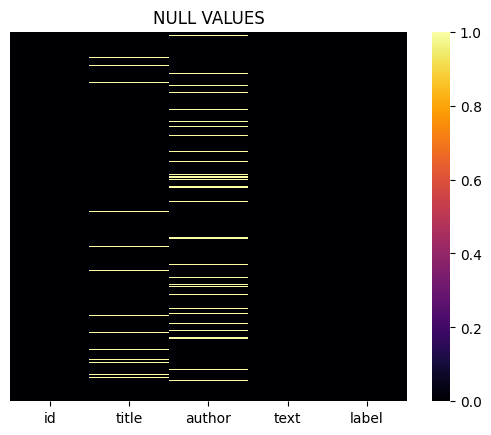

In [124]:
sns.heatmap(Data1,yticklabels=False,cmap='inferno')
plt.title('NULL VALUES')
plt.show()

In [5]:
Data.shape

(20800, 5)

In [6]:
Data = Data.dropna()
Data.isnull().any()

id        False
title     False
author    False
text      False
label     False
dtype: bool

In [7]:
Data.shape

(18285, 5)

In [8]:
X = Data.drop('label',axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
y = Data['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [10]:
y.unique()

array([1, 0], dtype=int64)

In [116]:
Counts = y.value_counts()
Counts

0    10361
1     7924
Name: label, dtype: int64

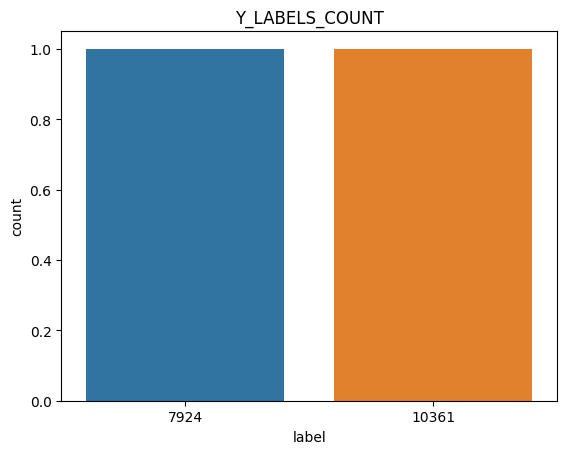

In [120]:
sns.countplot(y,x=Counts)
plt.title('Y_LABELS_COUNT')
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Bidirectional

In [14]:
messages = X.copy()
messages.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [15]:
messages.reset_index(inplace= True)

In [17]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [18]:
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

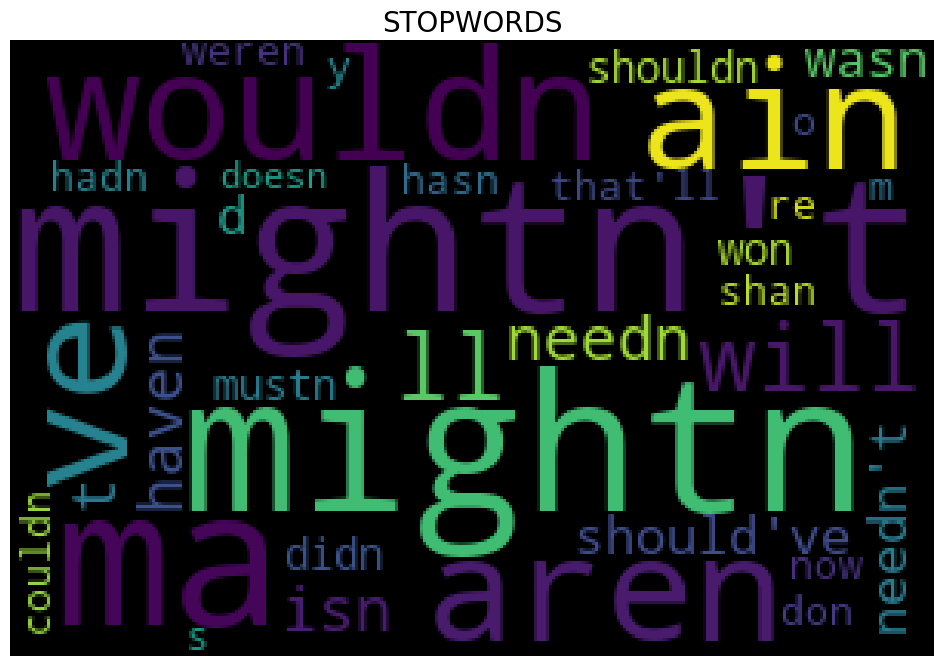

In [69]:
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud=WordCloud(width=300,height=200, contour_color='black').generate(' '.join(stopwords))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('STOPWORDS',fontsize=20,loc='center')
plt.show()

In [19]:
corpus =[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review =review.lower()
    review = review.split()
    
    review = [stemmer.stem(words) for words in review if not words in stopwords]
    review = ' '.join(review)
    corpus.append(review)

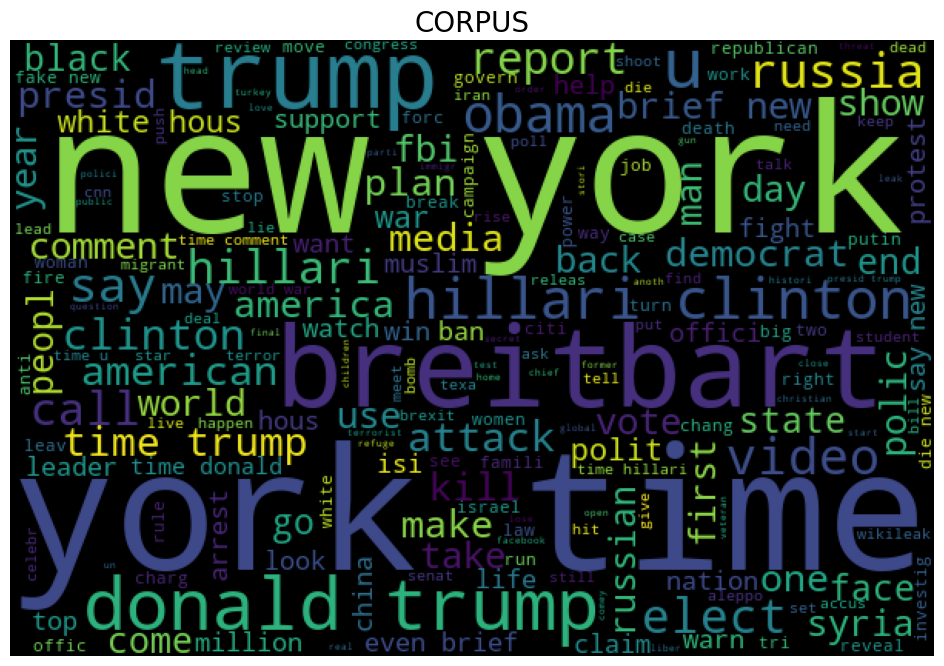

In [76]:
from wordcloud import WordCloud
plt.figure(figsize=(14,8))
wordcloud=WordCloud(width=600,height=400, contour_color='black').generate(' '.join(corpus))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('CORPUS',fontsize=20)
plt.show()

In [59]:
len(corpus)

18285

In [125]:
vocabulary_size = 5000

In [21]:
one_hot_rep = [one_hot(words,vocabulary_size)for words in corpus]
one_hot_rep[1]

[3257, 599, 4275, 3357, 2932, 3896, 4004]

In [22]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [23]:
sent_length = 20
embedded_docs = pad_sequences(one_hot_rep,padding='pre',maxlen=sent_length)
embedded_docs[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 3257,  599, 4275, 3357, 2932, 3896, 4004])

In [24]:
embedded_vector_length = 40
model = Sequential()
model.add(Embedding(vocabulary_size,embedded_vector_length,input_length=sent_length))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 bidirectional (Bidirection  (None, 200)               112800    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 313001 (1.19 MB)
Trainable params: 313001 (1.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [28]:
Model= model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
383/383 [==============================] - 11s 28ms/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.3735 - val_accuracy: 0.9120
Epoch 2/10
383/383 [==============================] - 11s 29ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.5148 - val_accuracy: 0.9120
Epoch 3/10
383/383 [==============================] - 11s 29ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.4733 - val_accuracy: 0.9060
Epoch 4/10
383/383 [==============================] - 10s 27ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.5224 - val_accuracy: 0.9059
Epoch 5/10
383/383 [==============================] - 11s 29ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.4997 - val_accuracy: 0.9125
Epoch 6/10
383/383 [==============================] - 11s 28ms/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.5633 - val_accuracy: 0.9089
Epoch 7/10
383/383 [==============================] - 11s 28ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.5463 - val_accuracy:

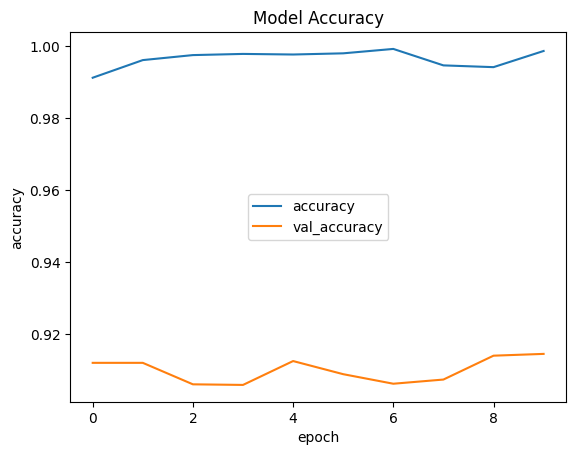

In [32]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='center')
plt.show()

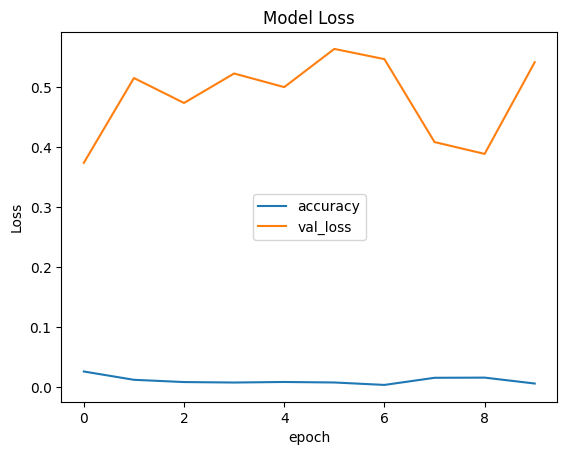

In [33]:
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['accuracy','val_loss'],loc='center')
plt.show()

In [86]:
pred = model.predict(X_test)

189/189 [==============================] - 2s 9ms/step


In [87]:
pred

array([[9.9993426e-01],
       [1.2100079e-03],
       [7.1105808e-03],
       ...,
       [4.4922061e-08],
       [9.9988502e-01],
       [9.9995899e-01]], dtype=float32)

In [88]:
prediction = np.where(pred > 0.5 ,1,0)
prediction

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [92]:
predict = pd.DataFrame(prediction)
value_counts =predict.value_counts()
value_counts

0    3227
1    2808
dtype: int64

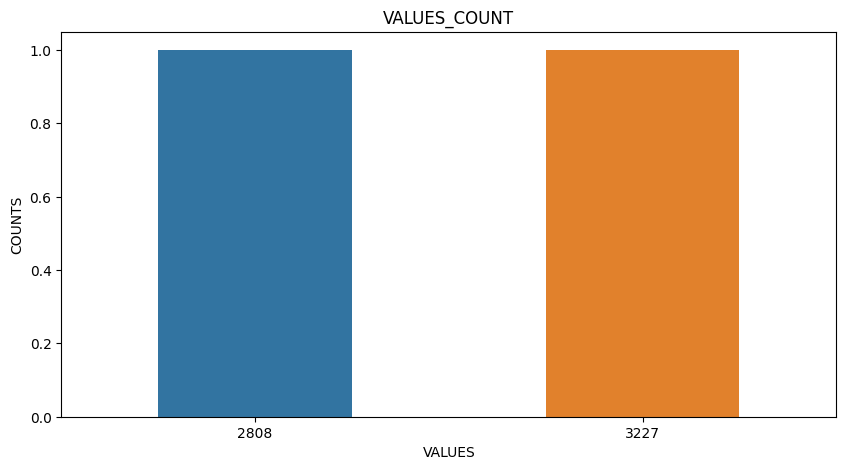

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(predict,x=value_counts,width=0.5)
plt.title('VALUES_COUNT')
plt.xlabel('VALUES')
plt.ylabel('COUNTS')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
conf =confusion_matrix(y_test,prediction)
conf

array([[3065,  354],
       [ 162, 2454]], dtype=int64)

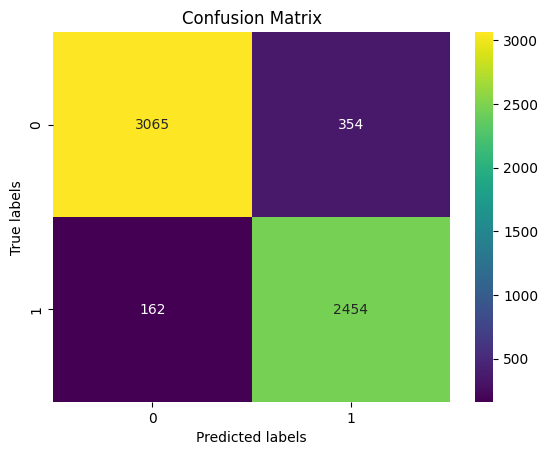

In [57]:
sns.heatmap(conf,annot = True, fmt='d',cmap='viridis')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
accuracy_score(y_test,prediction)

0.9144987572493787

In [82]:
weights = model.get_weights()

In [83]:
weights[0]

array([[ 0.01282213,  0.07909598,  0.12022724, ...,  0.03520175,
        -0.06144663, -0.02987612],
       [-0.06709973, -0.00454155,  0.03336902, ..., -0.00120924,
        -0.00153663,  0.00414103],
       [-0.09684779,  0.0337789 ,  0.02476973, ...,  0.07429308,
        -0.11613791, -0.07907501],
       ...,
       [ 0.0005991 , -0.00070707,  0.0267317 , ...,  0.04336863,
        -0.01730682,  0.04496967],
       [ 0.00301275,  0.03751853,  0.10994013, ...,  0.11795836,
        -0.1426721 , -0.08862101],
       [-0.06463146, -0.00770203,  0.01443135, ...,  0.04370373,
        -0.02258204, -0.02823296]], dtype=float32)